In [1]:
import pandas as pd
import numpy as np
from utils.utilities import *
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from tqdm import tqdm

#### Promoters-rJ-GFP

In [2]:
folder = '081-promoters-rJ-characterization-1'
raw_data = generate_raw(folder, filename='raw')

A ['Positive', 'Blank', 'Sample', 'Negative']


In [3]:
neg_corrected, pos_control = generate_neg_corrected(raw_data, ['A'], 'A') #list of samples, positive control
pos_corrected = generate_pos_corrected(neg_corrected, pos_control)[0]
final_data_1 = get_data_at(pos_corrected, h=8)

In [4]:
folder = '082-promoters-rJ-characterization-2'
raw_data = generate_raw(folder, filename='raw')

A ['Positive', 'Blank', 'Sample', 'Negative']


In [5]:
neg_corrected, pos_control = generate_neg_corrected(raw_data, ['A'], 'A') #list of samples, positive control
pos_corrected = generate_pos_corrected(neg_corrected, pos_control)[0]
final_data_2 = get_data_at(pos_corrected, h=8)

In [6]:
final_data_rJ = pd.concat([final_data_1, final_data_2], axis=0)
final_data_rJ

name
PBAD.1_0    0.025905
PBAD.1_1    0.021474
PBAD.1_2    0.020547
PBAD.1_3    0.020577
PBAD.1_4    0.020823
              ...   
PTtg_7      0.047564
PTtg_8      0.090306
PTtg_9      0.226874
PTtg_10     0.407074
PTtg_11     0.130088
Name: 8 h , Length: 144, dtype: float64

In [7]:
inducers_rJ = {
    'ara.1': [0, 4.95911E-05, 0.000198364, 0.000793457, 0.003173828, 0.012695313, 0.05078125, 0.203125, 0.8125, 3.25, 13, 52],
    'oc6': [0, 3.8147E-05, 0.000152588, 0.000610352, 0.002441406, 0.009765625, 0.0390625, 0.15625, 0.625, 2.5, 10, 40],
    'sal.1': [0, 0.00038147, 0.001525879, 0.006103516, 0.024414063, 0.09765625, 0.390625, 1.5625, 6.25, 25, 100, 400],
    'iptg': [0, 0.000953674, 0.003814697, 0.015258789, 0.061035156, 0.244140625, 0.9765625, 3.90625, 15.625, 62.5, 250, 1000],
    'ohc14.1': [0, 3.8147E-05, 0.000152588, 0.000610352, 0.002441406, 0.009765625, 0.0390625, 0.15625, 0.625, 2.5, 10, 40],
    'cuma': [0, 0.00038147, 0.001525879, 0.006103516, 0.024414063, 0.09765625, 0.390625, 1.5625, 6.25, 25, 100, 400],
    'ara.2': [0, 0.012695313, 0.025390625, 0.05078125, 0.1015625, 0.203125, 0.40625, 0.8125, 1.625, 3.25, 6.5, 13],
    'ohc14.2': [0, 0.0390625, 0.078125, 0.15625, 0.3125, 0.625, 1.25, 2.5, 5, 10, 20, 40],
    'sal.2': [0, 0.1953125, 0.390625, 0.78125, 1.5625, 3.125, 6.25, 12.5, 25, 50, 100, 200],
    'cho': [0, 0.019073486, 0.076293945, 0.305175781, 1.220703125, 4.8828125, 19.53125, 78.125, 312.5, 1250, 5000, 20000],
    'atc': [0, 1.90735E-06, 7.62939E-06, 3.05176E-05, 0.00012207, 0.000488281, 0.001953125, 0.0078125, 0.03125, 0.125, 0.5, 2],
    'nar': [0, 0.001907349, 0.007629395, 0.030517578, 0.122070313, 0.48828125, 1.953125, 7.8125, 31.25, 125, 500, 2000]
}
prom_ind_map_rJ = {
    'PBAD.1': 'ara.1', 'PLuxB': 'oc6', 'PSalTTC.1': 'sal.1', 'PTac': 'iptg', 'PCin.1': 'ohc14.1', 'PCymRC': 'cuma',
    'PBAD.2': 'ara.2', 'PCin.2': 'ohc14.2', 'PSalTTC.2': 'sal.2', 'PBetI': 'cho', 'PTet': 'atc', 'PTtg': 'nar'
}

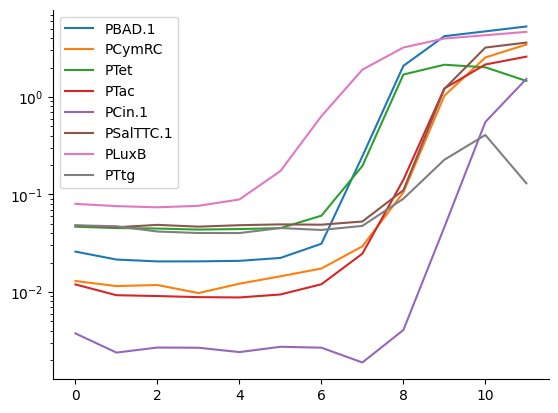

In [9]:
promoters = ['PBAD.1', 'PCymRC', 'PTet', 'PTac', 'PCin.1', 'PSalTTC.1', 'PLuxB', 'PTtg']
for p in promoters:
    promoter = final_data_rJ[final_data_rJ.index.str.startswith(p)].reset_index()
    promoter['lvl'] = promoter['name'].str.split('_', expand=True)[1].astype(int)
    promoter = promoter.sort_values('lvl').reset_index(drop=True)
    promoter['inducer'] = inducers_rJ[prom_ind_map_rJ[p]]
    plt.plot(promoter.index, promoter['8 h '], label=p)
plt.legend()
#plt.loglog()
plt.yscale('log')
sns.despine()

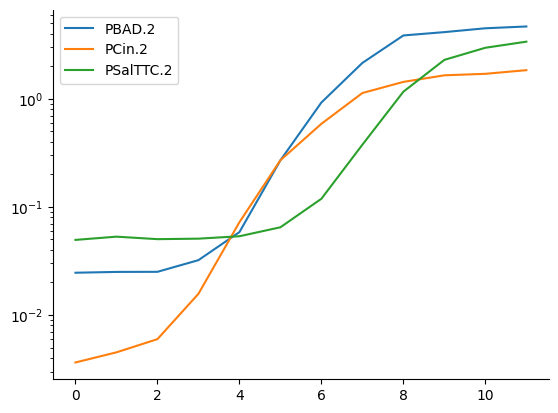

In [10]:
promoters = ['PBAD.2', 'PCin.2', 'PSalTTC.2']
for p in promoters:
    promoter = final_data_rJ[final_data_rJ.index.str.startswith(p)].reset_index()
    promoter['lvl'] = promoter['name'].str.split('_', expand=True)[1].astype(int)
    promoter = promoter.sort_values('lvl').reset_index(drop=True)
    promoter['inducer'] = inducers_rJ[prom_ind_map_rJ[p]]
    plt.plot(promoter.index, promoter['8 h '], label=p)
plt.legend()
#plt.loglog()
plt.yscale('log')
sns.despine()

#### Promoters-34-GFP

In [11]:
folder = '084-promoters-characterization'
promoters = ['PBAD', 'PCin', 'PSalTTC', 'PTac']
inducers_no_rJ = {
    'ara': [0, 0.000793457, 0.001586914, 0.003173828, 0.006347656, 0.012695313,
            0.025390625, 0.05078125, 0.1015625, 0.203125, 0.40625, 0.8125, 1.625, 3.25, 6.5, 13, 26, 52],
    'ohc14': [0, 0.002441406, 0.004882813, 0.009765625, 0.01953125, 0.0390625,
              0.078125, 0.15625, 0.3125, 0.625, 1.25, 2.5, 5, 10, 20, 40, 80, 160],
    'sal': [0, 0.024414063, 0.048828125, 0.09765625, 0.1953125, 0.390625,
            0.78125, 1.5625, 3.125, 6.25, 12.5, 25, 50, 100, 200, 400, 800, 1600],
    'iptg': [0, 0.030517578, 0.061035156, 0.122070313, 0.244140625, 0.48828125, 
             0.9765625, 1.953125, 3.90625, 7.8125, 15.625, 31.25, 62.5, 125, 250, 500, 1000, 2000]
}
prom_ind_map_no_rJ = {
    'PBAD': 'ara', 'PCin': 'ohc14', 'PSalTTC': 'sal', 'PTac': 'iptg'
}

In [12]:
raw_data = generate_raw(folder, filename='raw')

A ['Positive', 'Blank', 'Sample', 'Negative']


In [13]:
neg_corrected, pos_control = generate_neg_corrected(raw_data, ['A'], 'A') #list of samples, positive control
pos_corrected = generate_pos_corrected(neg_corrected, pos_control)[0]
final_data_no_rJ = get_data_at(pos_corrected, h=8)

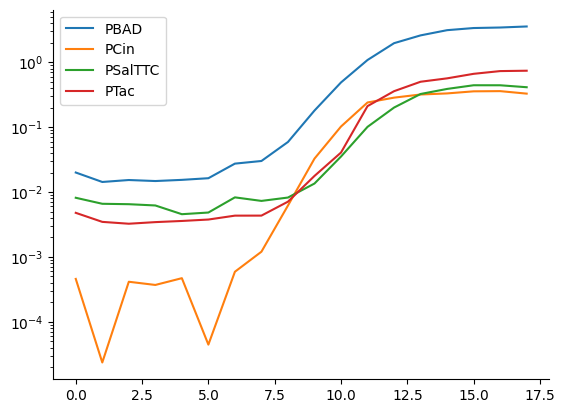

In [14]:
for p in promoters:
    promoter = final_data_no_rJ[final_data_no_rJ.index.str.startswith(p)].reset_index()
    promoter['lvl'] = promoter['name'].str.split('_', expand=True)[1].astype(int)
    promoter = promoter.sort_values('lvl').reset_index(drop=True)
    promoter['inducer'] = inducers_no_rJ[prom_ind_map_no_rJ[p]]
    plt.plot(promoter.index, promoter['8 h '], label=p)
plt.legend()
plt.yscale('log')
sns.despine()

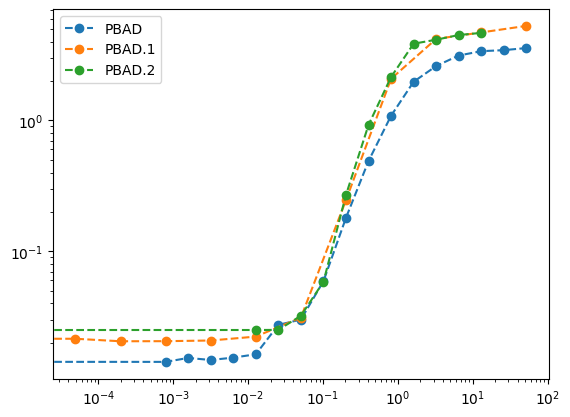

In [21]:
p1, p2, p3 = 'PBAD', 'PBAD.1', 'PBAD.2'

promoter1 = final_data_no_rJ[final_data_no_rJ.index.str.startswith(p1)].reset_index()
promoter1['lvl'] = promoter1['name'].str.split('_', expand=True)[1].astype(int)
promoter1 = promoter1.sort_values('lvl').reset_index(drop=True)
promoter1['inducer'] = inducers_no_rJ[prom_ind_map_no_rJ[p1]]

promoter2 = final_data_rJ[final_data_rJ.index.str.startswith(p2)].reset_index()
promoter2['lvl'] = promoter2['name'].str.split('_', expand=True)[1].astype(int)
promoter2 = promoter2.sort_values('lvl').reset_index(drop=True)
promoter2['inducer'] = inducers_rJ[prom_ind_map_rJ[p2]]

promoter3 = final_data_rJ[final_data_rJ.index.str.startswith(p3)].reset_index()
promoter3['lvl'] = promoter3['name'].str.split('_', expand=True)[1].astype(int)
promoter3 = promoter3.sort_values('lvl').reset_index(drop=True)
promoter3['inducer'] = inducers_rJ[prom_ind_map_rJ[p3]]

plt.plot(promoter1['inducer'], promoter1['8 h '], '--o', label=p1)
plt.plot(promoter2['inducer'], promoter2['8 h '], '--o', label=p2)
plt.plot(promoter3['inducer'], promoter3['8 h '], '--o', label=p3)
plt.loglog()
plt.legend()
plt.show()

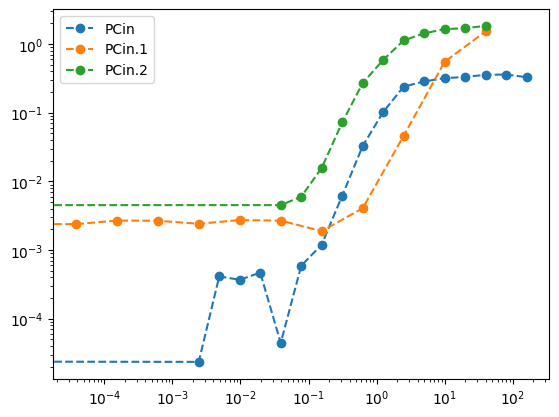

In [22]:
p1, p2, p3 = 'PCin', 'PCin.1', 'PCin.2'

promoter1 = final_data_no_rJ[final_data_no_rJ.index.str.startswith(p1)].reset_index()
promoter1['lvl'] = promoter1['name'].str.split('_', expand=True)[1].astype(int)
promoter1 = promoter1.sort_values('lvl').reset_index(drop=True)
promoter1['inducer'] = inducers_no_rJ[prom_ind_map_no_rJ[p1]]

promoter2 = final_data_rJ[final_data_rJ.index.str.startswith(p2)].reset_index()
promoter2['lvl'] = promoter2['name'].str.split('_', expand=True)[1].astype(int)
promoter2 = promoter2.sort_values('lvl').reset_index(drop=True)
promoter2['inducer'] = inducers_rJ[prom_ind_map_rJ[p2]]

promoter3 = final_data_rJ[final_data_rJ.index.str.startswith(p3)].reset_index()
promoter3['lvl'] = promoter3['name'].str.split('_', expand=True)[1].astype(int)
promoter3 = promoter3.sort_values('lvl').reset_index(drop=True)
promoter3['inducer'] = inducers_rJ[prom_ind_map_rJ[p3]]

plt.plot(promoter1['inducer'], promoter1['8 h '], '--o', label=p1)
plt.plot(promoter2['inducer'], promoter2['8 h '], '--o', label=p2)
plt.plot(promoter3['inducer'], promoter3['8 h '], '--o', label=p3)
plt.loglog()
plt.legend()
plt.show()

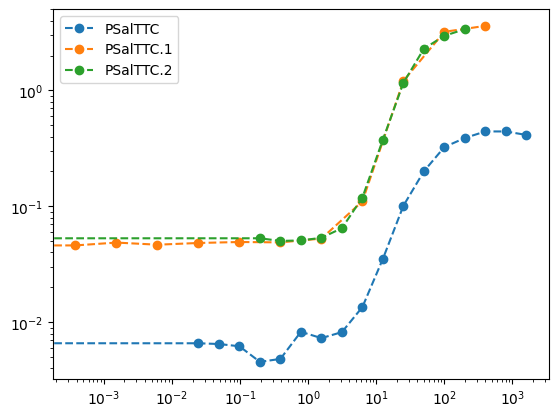

In [23]:
p1, p2, p3 = 'PSalTTC', 'PSalTTC.1', 'PSalTTC.2'

promoter1 = final_data_no_rJ[final_data_no_rJ.index.str.startswith(p1)].reset_index()
promoter1['lvl'] = promoter1['name'].str.split('_', expand=True)[1].astype(int)
promoter1 = promoter1.sort_values('lvl').reset_index(drop=True)
promoter1['inducer'] = inducers_no_rJ[prom_ind_map_no_rJ[p1]]

promoter2 = final_data_rJ[final_data_rJ.index.str.startswith(p2)].reset_index()
promoter2['lvl'] = promoter2['name'].str.split('_', expand=True)[1].astype(int)
promoter2 = promoter2.sort_values('lvl').reset_index(drop=True)
promoter2['inducer'] = inducers_rJ[prom_ind_map_rJ[p2]]

promoter3 = final_data_rJ[final_data_rJ.index.str.startswith(p3)].reset_index()
promoter3['lvl'] = promoter3['name'].str.split('_', expand=True)[1].astype(int)
promoter3 = promoter3.sort_values('lvl').reset_index(drop=True)
promoter3['inducer'] = inducers_rJ[prom_ind_map_rJ[p3]]

plt.plot(promoter1['inducer'], promoter1['8 h '], '--o', label=p1)
plt.plot(promoter2['inducer'], promoter2['8 h '], '--o', label=p2)
plt.plot(promoter3['inducer'], promoter3['8 h '], '--o', label=p3)
plt.loglog()
plt.legend()
plt.show()